# Data Science Project - Air Quality

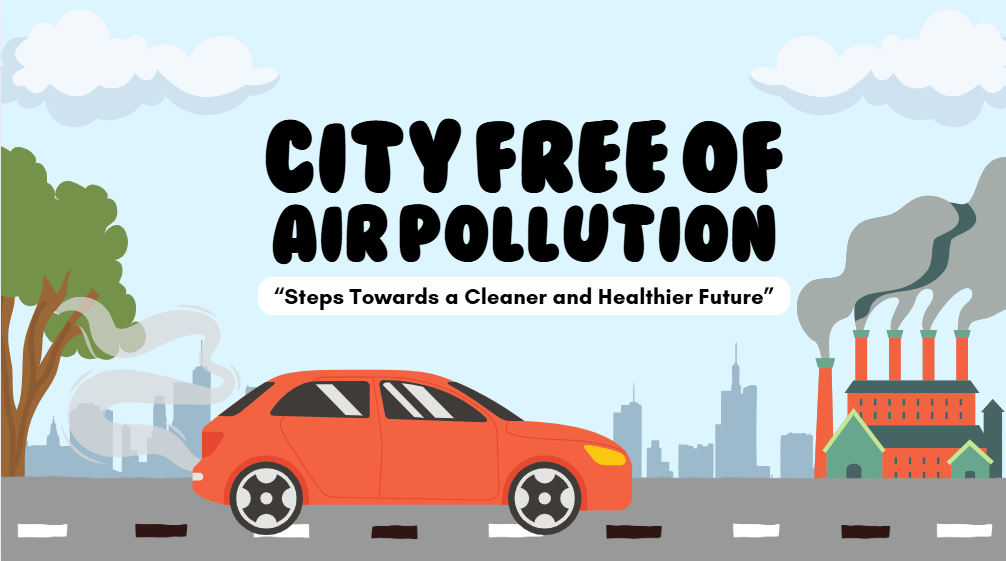

# Data Analyzing

In [1]:
import pandas as pd
import numpy as np

# Load the dataset to inspect its structure and content
file_path = '/kaggle/input/airquality/AirQualityUCI.csv'
data = pd.read_csv(file_path, sep=';')  # Assuming the file uses semicolon as a separator

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()
data_tail = data.tail()
data_summary = data.describe(include='all')

data_info, data_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


(None,
               Date      Time CO(GT)  PT08.S1(CO)     NMHC(GT) C6H6(GT)  \
 count         9357      9357   9357  9357.000000  9357.000000     9357   
 unique         391        24    104          NaN          NaN      408   
 top     21/09/2004  18.00.00   -200          NaN          NaN   -200,0   
 freq            24       390   1592          NaN          NaN      366   
 mean           NaN       NaN    NaN  1048.990061  -159.090093      NaN   
 std            NaN       NaN    NaN   329.832710   139.789093      NaN   
 min            NaN       NaN    NaN  -200.000000  -200.000000      NaN   
 25%            NaN       NaN    NaN   921.000000  -200.000000      NaN   
 50%            NaN       NaN    NaN  1053.000000  -200.000000      NaN   
 75%            NaN       NaN    NaN  1221.000000  -200.000000      NaN   
 max            NaN       NaN    NaN  2040.000000  1189.000000      NaN   
 
         PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  \
 count     

In [2]:
data_head

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

In [3]:
data_tail

Date Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
9466  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9467  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9468  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9469  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9470  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)    T   RH   AH  \
9466           NaN      NaN           NaN          NaN  NaN  NaN  NaN   
9467           NaN      NaN           NaN          NaN  NaN  NaN  NaN   
9468           NaN      NaN           NaN          NaN  NaN  NaN  NaN   
9469           NaN      NaN           NaN          NaN  NaN  NaN  NaN   
9470           NaN      NaN           NaN          NaN  NaN  NaN  NaN   

      Unnamed: 15  Unnamed: 16  
9466          NaN          NaN  
9467          NaN          NaN  
9468          NaN          NaN  
9469          NaN          NaN  
9470          NaN          NaN

# Preprocessing - Data Cleaning

# Correcting Errors
## Drop Some columns & Correct Invalid Data Formats

In [4]:
# Step 1: Drop unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Step 2: Combine Date and Time columns into a single datetime column
data_cleaned['DateTime'] = pd.to_datetime(
    data_cleaned['Date'] + ' ' + data_cleaned['Time'],
    format='%d/%m/%Y %H.%M.%S',
    errors='coerce'  # Handle invalid date formats
)

# Drop the original Date and Time columns
data_cleaned = data_cleaned.drop(columns=['Date', 'Time'])

# Step 3: Replace commas with periods in numeric columns and convert to float
def clean_and_convert(column):
    return pd.to_numeric(data_cleaned[column].str.replace(',', '.', regex=False), errors='coerce')

numeric_columns = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in numeric_columns:
    data_cleaned[col] = clean_and_convert(col)

# Remove the rows that are all non-N
data_cleaned = data_cleaned.dropna(how='all')

# Step 4: Identify and handle placeholder values (-200) for numeric columns
data_cleaned.replace(-200, pd.NA, inplace=True)

# Display the cleaned dataset and missing value summary
data_cleaned.head()

CO(GT) PT08.S1(CO) NMHC(GT) C6H6(GT) PT08.S2(NMHC) NOx(GT) PT08.S3(NOx)  \
0    2.6      1360.0    150.0     11.9        1046.0   166.0       1056.0   
1    2.0      1292.0    112.0      9.4         955.0   103.0       1174.0   
2    2.2      1402.0     88.0      9.0         939.0   131.0       1140.0   
3    2.2      1376.0     80.0      9.2         948.0   172.0       1092.0   
4    1.6      1272.0     51.0      6.5         836.0   131.0       1205.0   

  NO2(GT) PT08.S4(NO2) PT08.S5(O3)     T    RH      AH            DateTime  
0   113.0       1692.0      1268.0  13.6  48.9  0.7578 2004-03-10 18:00:00  
1    92.0       1559.0       972.0  13.3  47.7  0.7255 2004-03-10 19:00:00  
2   114.0       1555.0      1074.0  11.9  54.0  0.7502 2004-03-10 20:00:00  
3   122.0       1584.0      1203.0  11.0  60.0  0.7867 2004-03-10 21:00:00  
4   116.0       1490.0      1110.0  11.2  59.6  0.7888 2004-03-10 22:00:00

## Check Data Types

In [5]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         7674 non-null   object        
 1   PT08.S1(CO)    8991 non-null   object        
 2   NMHC(GT)       914 non-null    object        
 3   C6H6(GT)       8991 non-null   object        
 4   PT08.S2(NMHC)  8991 non-null   object        
 5   NOx(GT)        7718 non-null   object        
 6   PT08.S3(NOx)   8991 non-null   object        
 7   NO2(GT)        7715 non-null   object        
 8   PT08.S4(NO2)   8991 non-null   object        
 9   PT08.S5(O3)    8991 non-null   object        
 10  T              8991 non-null   object        
 11  RH             8991 non-null   object        
 12  AH             8991 non-null   object        
 13  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 1.1+ MB


# Missing Data
## Count of it

In [6]:
missing_data = data_cleaned.isnull().sum()
print(missing_data)
missing_percentage = (data_cleaned.isnull().sum() / len(data_cleaned)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': data_cleaned.isnull().sum(),
    'Missing Percentage': (data_cleaned.isnull().sum() / len(data_cleaned)) * 100
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
missing_summary

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
dtype: int64


Missing Count  Missing Percentage
CO(GT)                  1683           17.986534
PT08.S1(CO)              366            3.911510
NMHC(GT)                8443           90.231912
C6H6(GT)                 366            3.911510
PT08.S2(NMHC)            366            3.911510
NOx(GT)                 1639           17.516298
PT08.S3(NOx)             366            3.911510
NO2(GT)                 1642           17.548360
PT08.S4(NO2)             366            3.911510
PT08.S5(O3)              366            3.911510
T                        366            3.911510
RH                       366            3.911510
AH                       366            3.911510

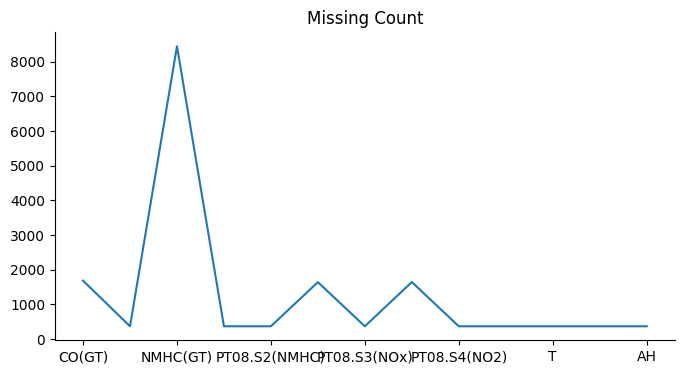

In [7]:
from matplotlib import pyplot as plt
missing_summary['Missing Count'].plot(kind='line', figsize=(8, 4), title='Missing Count')
plt.gca().spines[['top', 'right']].set_visible(False)

## Debugging Placeholders

In [8]:
# Step 4 Debugging: Identify problematic replacement scenarios

# Check for the presence of the placeholder value -200
placeholder_summary = (data_cleaned == -200).sum()

# Attempt a safer replacement for -200 with NaN in relevant columns only
for col in numeric_columns:
    if col in data_cleaned.columns:
        data_cleaned[col] = data_cleaned[col].replace(-200, pd.NA)

# Recheck missing values and ensure no errors
missing_summary_after_fix = data_cleaned.isnull().sum()

placeholder_summary, missing_summary_after_fix


(CO(GT)           0
 PT08.S1(CO)      0
 NMHC(GT)         0
 C6H6(GT)         0
 PT08.S2(NMHC)    0
 NOx(GT)          0
 PT08.S3(NOx)     0
 NO2(GT)          0
 PT08.S4(NO2)     0
 PT08.S5(O3)      0
 T                0
 RH               0
 AH               0
 DateTime         0
 dtype: int64,
 CO(GT)           1683
 PT08.S1(CO)       366
 NMHC(GT)         8443
 C6H6(GT)          366
 PT08.S2(NMHC)     366
 NOx(GT)          1639
 PT08.S3(NOx)      366
 NO2(GT)          1642
 PT08.S4(NO2)      366
 PT08.S5(O3)       366
 T                 366
 RH                366
 AH                366
 DateTime            0
 dtype: int64)

## Checking the types of Data

In [9]:
# Check the data types of columns to identify any potential issues
column_types = data_cleaned.dtypes

# Attempting to detect columns with unexpected types or anomalies
unexpected_types = column_types[~column_types.isin([np.float64, np.int64, 'datetime64[ns]', 'object'])]

# Output column types and unexpected type summary for debugging
column_types, unexpected_types


(CO(GT)                   object
 PT08.S1(CO)              object
 NMHC(GT)                 object
 C6H6(GT)                 object
 PT08.S2(NMHC)            object
 NOx(GT)                  object
 PT08.S3(NOx)             object
 NO2(GT)                  object
 PT08.S4(NO2)             object
 PT08.S5(O3)              object
 T                        object
 RH                       object
 AH                       object
 DateTime         datetime64[ns]
 dtype: object,
 CO(GT)                   object
 PT08.S1(CO)              object
 NMHC(GT)                 object
 C6H6(GT)                 object
 PT08.S2(NMHC)            object
 NOx(GT)                  object
 PT08.S3(NOx)             object
 NO2(GT)                  object
 PT08.S4(NO2)             object
 PT08.S5(O3)              object
 T                        object
 RH                       object
 AH                       object
 DateTime         datetime64[ns]
 dtype: object)

In [10]:
data_cleaned.isna().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
dtype: int64

## Handeling Missing Data

##### Remove rows	Essential variable for handeling missing data

In [11]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Assuming data_cleaned is your DataFrame
# Convert 'NOx(GT)' and 'NO2(GT)' to numeric
data_cleaned['NOx(GT)'] = pd.to_numeric(data_cleaned['NOx(GT)'], errors='coerce')
data_cleaned['NO2(GT)'] = pd.to_numeric(data_cleaned['NO2(GT)'], errors='coerce')

# Initialize imputers
knn_imputer = KNNImputer(n_neighbors=5)
mean_imputer = SimpleImputer(strategy="mean")

# Handle missing data
# 1. NOx(GT) - Advanced Imputation (KNN)
data_cleaned['NOx(GT)'] = knn_imputer.fit_transform(data_cleaned[['NOx(GT)']])

# 2. NO2(GT) - Advanced Imputation (KNN)
data_cleaned['NO2(GT)'] = knn_imputer.fit_transform(data_cleaned[['NO2(GT)']])

# 3. PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3), T, RH, AH - Mean/Median Imputation
columns_to_impute = [
    'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
]

# Ensure these columns are numeric
data_cleaned[columns_to_impute] = data_cleaned[columns_to_impute].apply(pd.to_numeric, errors='coerce')

# Apply mean imputation
data_cleaned[columns_to_impute] = mean_imputer.fit_transform(data_cleaned[columns_to_impute])

# 4. NMHC(GT) - Remove rows with missing values (extremely high missing percentage)
data_cleaned = data_cleaned.dropna(subset=['NMHC(GT)'])

# 5. DateTime - Remove rows with missing values (essential variable for handling missing data)
data_cleaned = data_cleaned.dropna(subset=['DateTime'])

# Verify changes
print(data_cleaned.isnull().sum())  # Check remaining missing values
data = data_cleaned


CO(GT)           24
PT08.S1(CO)       0
NMHC(GT)          0
C6H6(GT)          0
PT08.S2(NMHC)     0
NOx(GT)           0
PT08.S3(NOx)      0
NO2(GT)           0
PT08.S4(NO2)      0
PT08.S5(O3)       0
T                 0
RH                0
AH                0
DateTime          0
dtype: int64


## Drop nulls

In [12]:
# drop rows with null values 
data_cleaned = data_cleaned.dropna()

# Check if nulls are removed
print(data_cleaned.isnull().sum())

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
DateTime         0
dtype: int64


In [13]:
data_cleaned.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
DateTime         0
dtype: int64

In [14]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         890 non-null    object        
 1   PT08.S1(CO)    890 non-null    float64       
 2   NMHC(GT)       890 non-null    object        
 3   C6H6(GT)       890 non-null    float64       
 4   PT08.S2(NMHC)  890 non-null    float64       
 5   NOx(GT)        890 non-null    float64       
 6   PT08.S3(NOx)   890 non-null    float64       
 7   NO2(GT)        890 non-null    float64       
 8   PT08.S4(NO2)   890 non-null    float64       
 9   PT08.S5(O3)    890 non-null    float64       
 10  T              890 non-null    float64       
 11  RH             890 non-null    float64       
 12  AH             890 non-null    float64       
 13  DateTime       890 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 104.3+ KB


In [15]:
data_cleaned['CO(GT)'] = data_cleaned['CO(GT)'].astype(float)

# Convert the 'NMHC(GT)' column to float
data_cleaned['NMHC(GT)'] = pd.to_numeric(data_cleaned['NMHC(GT)'], errors='coerce')
# Verify the conversion
print(data_cleaned['NMHC(GT)'].dtype)


float64


/tmp/ipykernel_17/2655901065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['CO(GT)'] = data_cleaned['CO(GT)'].astype(float)
/tmp/ipykernel_17/2655901065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['NMHC(GT)'] = pd.to_numeric(data_cleaned['NMHC(GT)'], errors='coerce')


In [16]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         890 non-null    float64       
 1   PT08.S1(CO)    890 non-null    float64       
 2   NMHC(GT)       890 non-null    float64       
 3   C6H6(GT)       890 non-null    float64       
 4   PT08.S2(NMHC)  890 non-null    float64       
 5   NOx(GT)        890 non-null    float64       
 6   PT08.S3(NOx)   890 non-null    float64       
 7   NO2(GT)        890 non-null    float64       
 8   PT08.S4(NO2)   890 non-null    float64       
 9   PT08.S5(O3)    890 non-null    float64       
 10  T              890 non-null    float64       
 11  RH             890 non-null    float64       
 12  AH             890 non-null    float64       
 13  DateTime       890 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 104.3 KB


# Removing Duplicates
## Find & Drop

In [17]:
# Step 1: Identify duplicate rows
duplicate_rows = data_cleaned[data_cleaned.duplicated()]

# Display information about duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
if len(duplicate_rows) > 0:
    print("Duplicate rows:")
    print(duplicate_rows)

# Step 2: Drop duplicate rows
data_cleaned_no_duplicates = data_cleaned.drop_duplicates()

# Step 3: Confirm the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {len(data_cleaned_no_duplicates)}")

# Output a summary
print("Duplicates have been removed.")


Number of duplicate rows: 0
Number of rows after removing duplicates: 890
Duplicates have been removed.


# outliers
## Visualization with Outliers

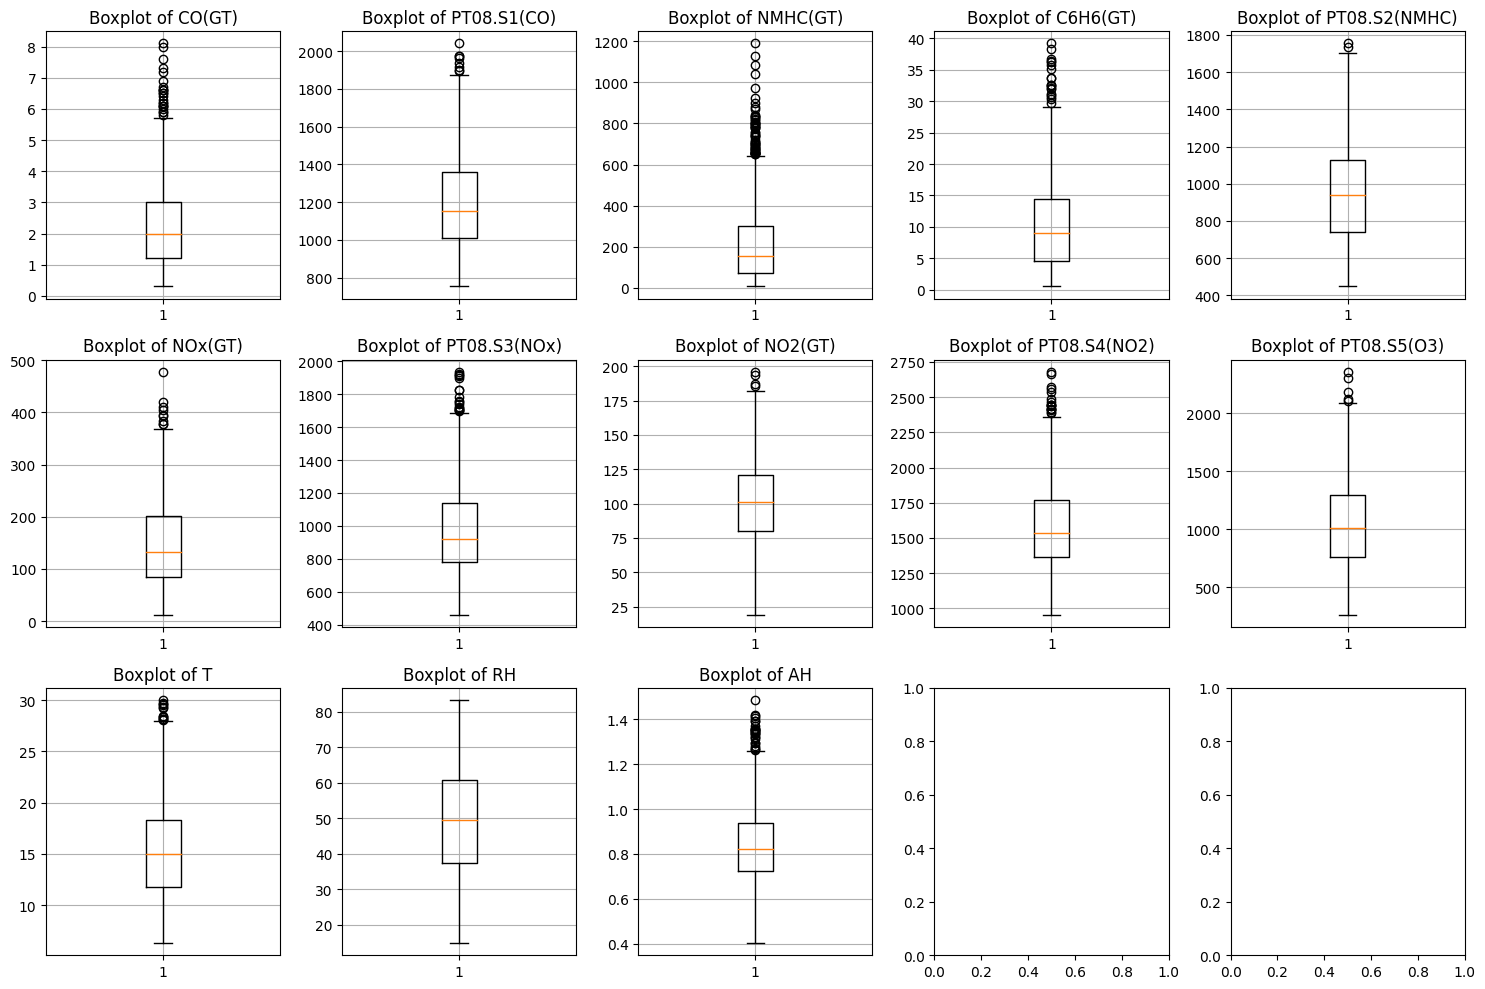

In [18]:
import matplotlib.pyplot as plt

# Number of rows and columns for the subplot grid (adjust as needed)
n_rows = 3  # Number of rows
n_cols = 5  # Number of columns

# Create a single figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to easily index

# Get numeric columns from the data
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns):
    ax = axes[i]  # Select the appropriate subplot
    ax.boxplot(data_cleaned[col].dropna())
    ax.set_title(f"Boxplot of {col}")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Identify outliers

In [19]:
import pandas as pd
from scipy.stats import zscore

# Select only numeric columns for outlier detection
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores for each column
z_scores = numeric_data.apply(zscore)

# Set a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers: True indicates a value is an outlier
outliers = (z_scores.abs() > threshold)

# Add an 'Outlier' column to flag rows with any outliers
data_cleaned['Outlier'] = outliers.any(axis=1)

# Count the number of outliers
num_outliers = data_cleaned['Outlier'].sum()

# Print the results
print(f"Number of outliers detected: {num_outliers}")
print("Sample of rows flagged as outliers:")
print(data_cleaned[data_cleaned['Outlier']].head())


Number of outliers detected: 36
Sample of rows flagged as outliers:
     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
11      0.7       1066.0       8.0       1.1          512.0     16.0   
25      6.9       1776.0     461.0      27.4         1488.0    383.0   
35      0.6        847.0       7.0       1.0          501.0     30.0   
50      6.6       1843.0     488.0      32.6         1610.0    340.0   
111     8.1       1961.0     618.0      36.7         1701.0    478.0   

     PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
11         1918.0     28.0        1182.0        422.0  11.0  56.2  0.7366   
25          702.0    172.0        2333.0       1704.0   9.7  69.3  0.8319   
35         1895.0     44.0        1155.0        394.0   6.3  65.0  0.6233   
50          624.0    170.0        2390.0       1887.0  12.9  50.5  0.7478   
111         537.0    149.0        2665.0       2184.0  14.8  54.3  0.9076   

               DateTime  Outlier  
1

/tmp/ipykernel_17/1488085351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Outlier'] = outliers.any(axis=1)


In [20]:
data = data_cleaned

## Visualization

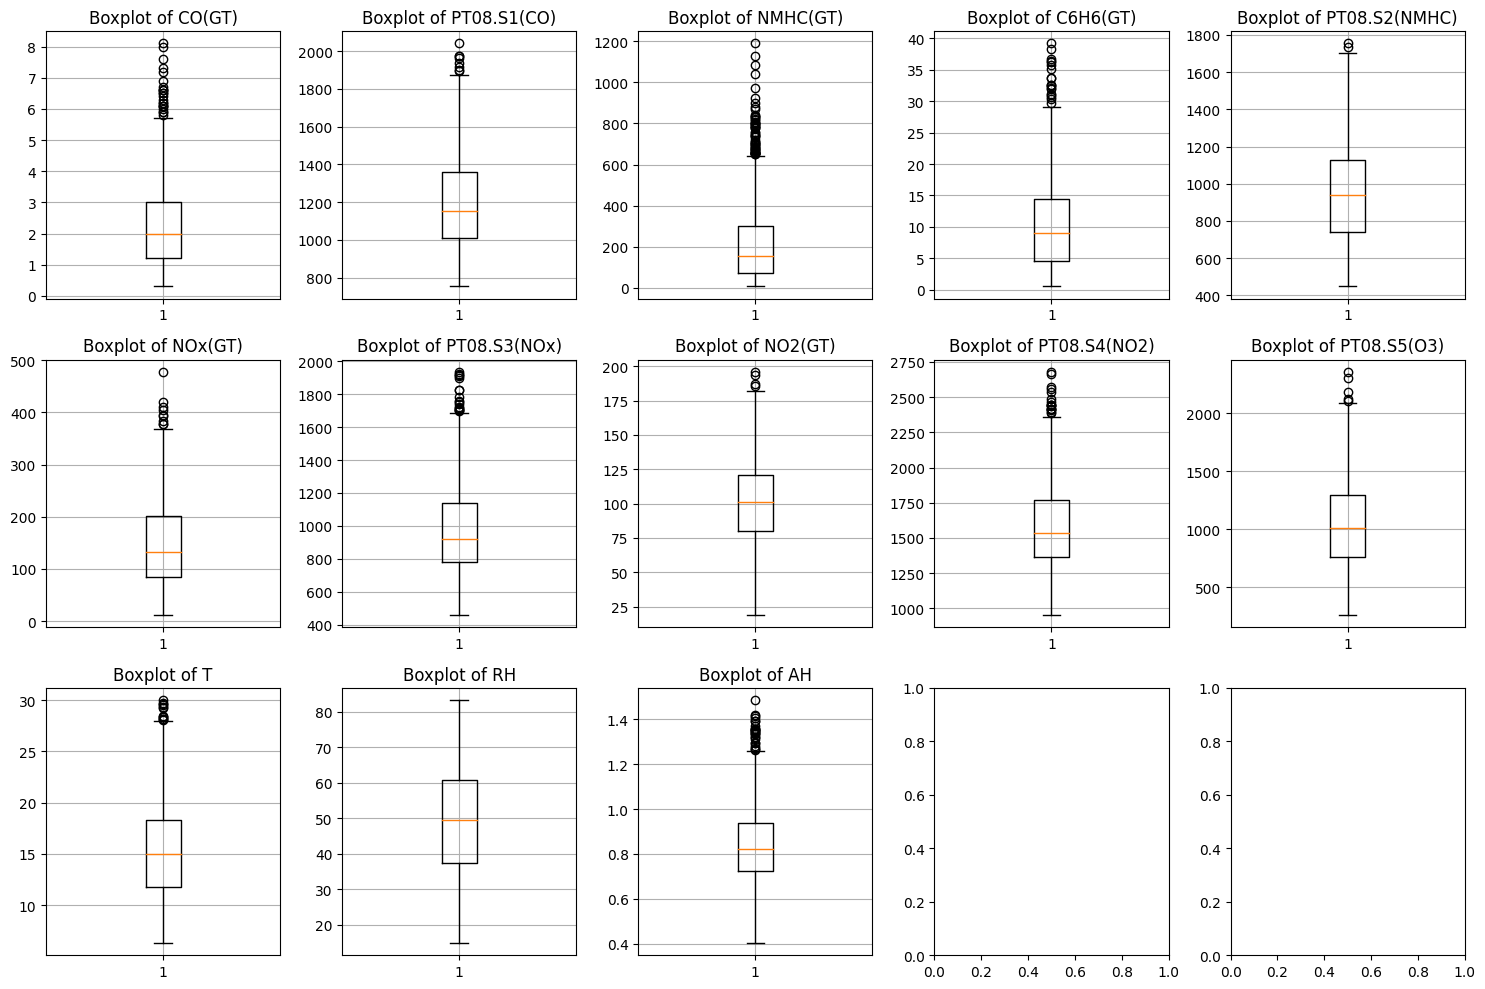

In [21]:
import matplotlib.pyplot as plt

# Number of rows and columns for the subplot grid (adjust as needed)
n_rows = 3  # Number of rows
n_cols = 5  # Number of columns

# Create a single figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to easily index

# Get numeric columns from the data
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns):
    ax = axes[i]  # Select the appropriate subplot
    ax.boxplot(data_cleaned[col].dropna())
    ax.set_title(f"Boxplot of {col}")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Data Transformation
## Normalization/Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Selection of numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Scaling to interval [0, 1]
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# or standardization (Z-Score)
standard_scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[numeric_columns] = standard_scaler.fit_transform(data[numeric_columns])

In [23]:
data_normalized.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
0  0.294872     0.471639  0.120981  0.294574       0.457887  0.330472   
1  0.217949     0.418803  0.088832  0.229974       0.388208  0.195279   
2  0.243590     0.504274  0.068528  0.219638       0.375957  0.255365   
3  0.243590     0.484071  0.061760  0.224806       0.382848  0.343348   
4  0.166667     0.403263  0.037225  0.155039       0.297090  0.255365   

   PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH  \
0      0.403664  0.531073      0.427494     0.479485  0.308017  0.497804   
1      0.483718  0.412429      0.350348     0.338263  0.295359  0.480234   
2      0.460651  0.536723      0.348028     0.386927  0.236287  0.572474   
3      0.428087  0.581921      0.364849     0.448473  0.198312  0.660322   
4      0.504749  0.548023      0.310325     0.404103  0.206751  0.654466   

         AH            DateTime  Outlier  
0  0.328285 2004-03-10 18:00:00    False  
1  0.298458 2004-03-10 19:00:00    False  
2  0.321267 2004-03-10 20:00:00    False  
3  0.354973 2004-03-10 21:00:00    False  
4  0.356912 2004-03-10 22:00:00    False

In [24]:
data_standardized.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
0  0.218659     0.690946 -0.359407  0.200016       0.353781  0.210504   
1 -0.209361     0.407825 -0.544866 -0.141542       0.011315 -0.556428   
2 -0.066688     0.865816 -0.661998 -0.196192      -0.048899 -0.215569   
3 -0.066688     0.757563 -0.701042 -0.168867      -0.015029  0.283545   
4 -0.494707     0.324554 -0.842576 -0.537750      -0.436525 -0.215569   

   PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH  \
0      0.306713  0.388929      0.359400     0.599988 -0.405730 -0.039347   
1      0.743557 -0.295760     -0.085728    -0.150515 -0.468716 -0.119233   
2      0.617686  0.421533     -0.099116     0.108104 -0.762655  0.300171   
3      0.439987  0.682367     -0.002058     0.435182 -0.951615  0.699605   
4      0.858321  0.486742     -0.316660     0.199382 -0.909624  0.672976   

         AH            DateTime  Outlier  
0 -0.447557 2004-03-10 18:00:00    False  
1 -0.628886 2004-03-10 19:00:00    False  
2 -0.490222 2004-03-10 20:00:00    False  
3 -0.285315 2004-03-10 21:00:00    False  
4 -0.273525 2004-03-10 22:00:00    False

## Choose One of Them
##### because we will use neural networks model, it is better to use **z-score standardization**. 

In [25]:
data = data_standardized

# Correlation
## Calculation

In [26]:
# Drop non-numeric columns
numeric_dataset = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_dataset.corr()

# Display the correlation matrix
correlation_matrix

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.929726  0.889734  0.967518       0.953559   
PT08.S1(CO)    0.929726     1.000000  0.781398  0.931788       0.936996   
NMHC(GT)       0.889734     0.781398  1.000000  0.896409       0.872272   
C6H6(GT)       0.967518     0.931788  0.896409  1.000000       0.984462   
PT08.S2(NMHC)  0.953559     0.936996  0.872272  0.984462       1.000000   
NOx(GT)        0.841346     0.801785  0.727471  0.816571       0.798045   
PT08.S3(NOx)  -0.818067    -0.820699 -0.766349 -0.844891      -0.907256   
NO2(GT)        0.818525     0.810331  0.698489  0.800180       0.825149   
PT08.S4(NO2)   0.930589     0.945509  0.844837  0.958637       0.955381   
PT08.S5(O3)    0.877911     0.932423  0.761310  0.897247       0.909239   
T              0.332611     0.331596  0.377736  0.429289       0.455426   
RH            -0.126664    -0.062614 -0.176495 -0.196960      -0.211561   
AH             0.280388     0.373522  0.270109  0.297689       0.308286   

                NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
CO(GT)         0.841346     -0.818067  0.818525      0.930589     0.877911   
PT08.S1(CO)    0.801785     -0.820699  0.810331      0.945509     0.932423   
NMHC(GT)       0.727471     -0.766349  0.698489      0.844837     0.761310   
C6H6(GT)       0.816571     -0.844891  0.800180      0.958637     0.897247   
PT08.S2(NMHC)  0.798045     -0.907256  0.825149      0.955381     0.909239   
NOx(GT)        1.000000     -0.685343  0.847393      0.802118     0.795658   
PT08.S3(NOx)  -0.685343      1.000000 -0.749014     -0.867737    -0.855363   
NO2(GT)        0.847393     -0.749014  1.000000      0.759377     0.797642   
PT08.S4(NO2)   0.802118     -0.867737  0.759377      1.000000     0.917705   
PT08.S5(O3)    0.795658     -0.855363  0.797642      0.917705     1.000000   
T              0.191304     -0.441348  0.385281      0.348988     0.324238   
RH            -0.004676      0.113139 -0.204559     -0.005948    -0.029801   
AH             0.260863     -0.459706  0.213940      0.484340     0.425344   

                      T        RH        AH  
CO(GT)         0.332611 -0.126664  0.280388  
PT08.S1(CO)    0.331596 -0.062614  0.373522  
NMHC(GT)       0.377736 -0.176495  0.270109  
C6H6(GT)       0.429289 -0.196960  0.297689  
PT08.S2(NMHC)  0.455426 -0.211561  0.308286  
NOx(GT)        0.191304 -0.004676  0.260863  
PT08.S3(NOx)  -0.441348  0.113139 -0.459706  
NO2(GT)        0.385281 -0.204559  0.213940  
PT08.S4(NO2)   0.348988 -0.005948  0.484340  
PT08.S5(O3)    0.324238 -0.029801  0.425344  
T              1.000000 -0.766056  0.179734  
RH            -0.766056  1.000000  0.463359  
AH             0.179734  0.463359  1.000000

## Showing

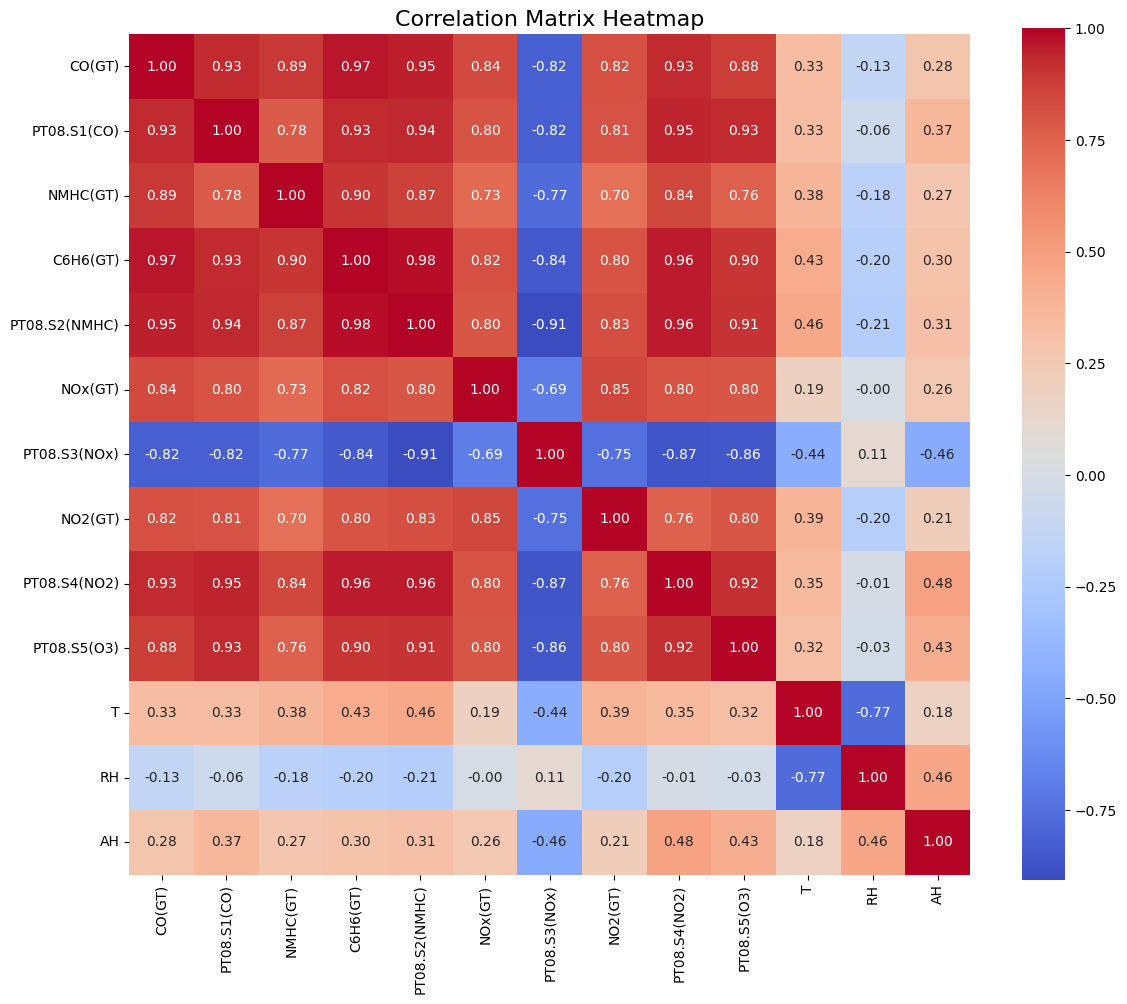

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add title and adjust layout for better visibility
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


## Pair Plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

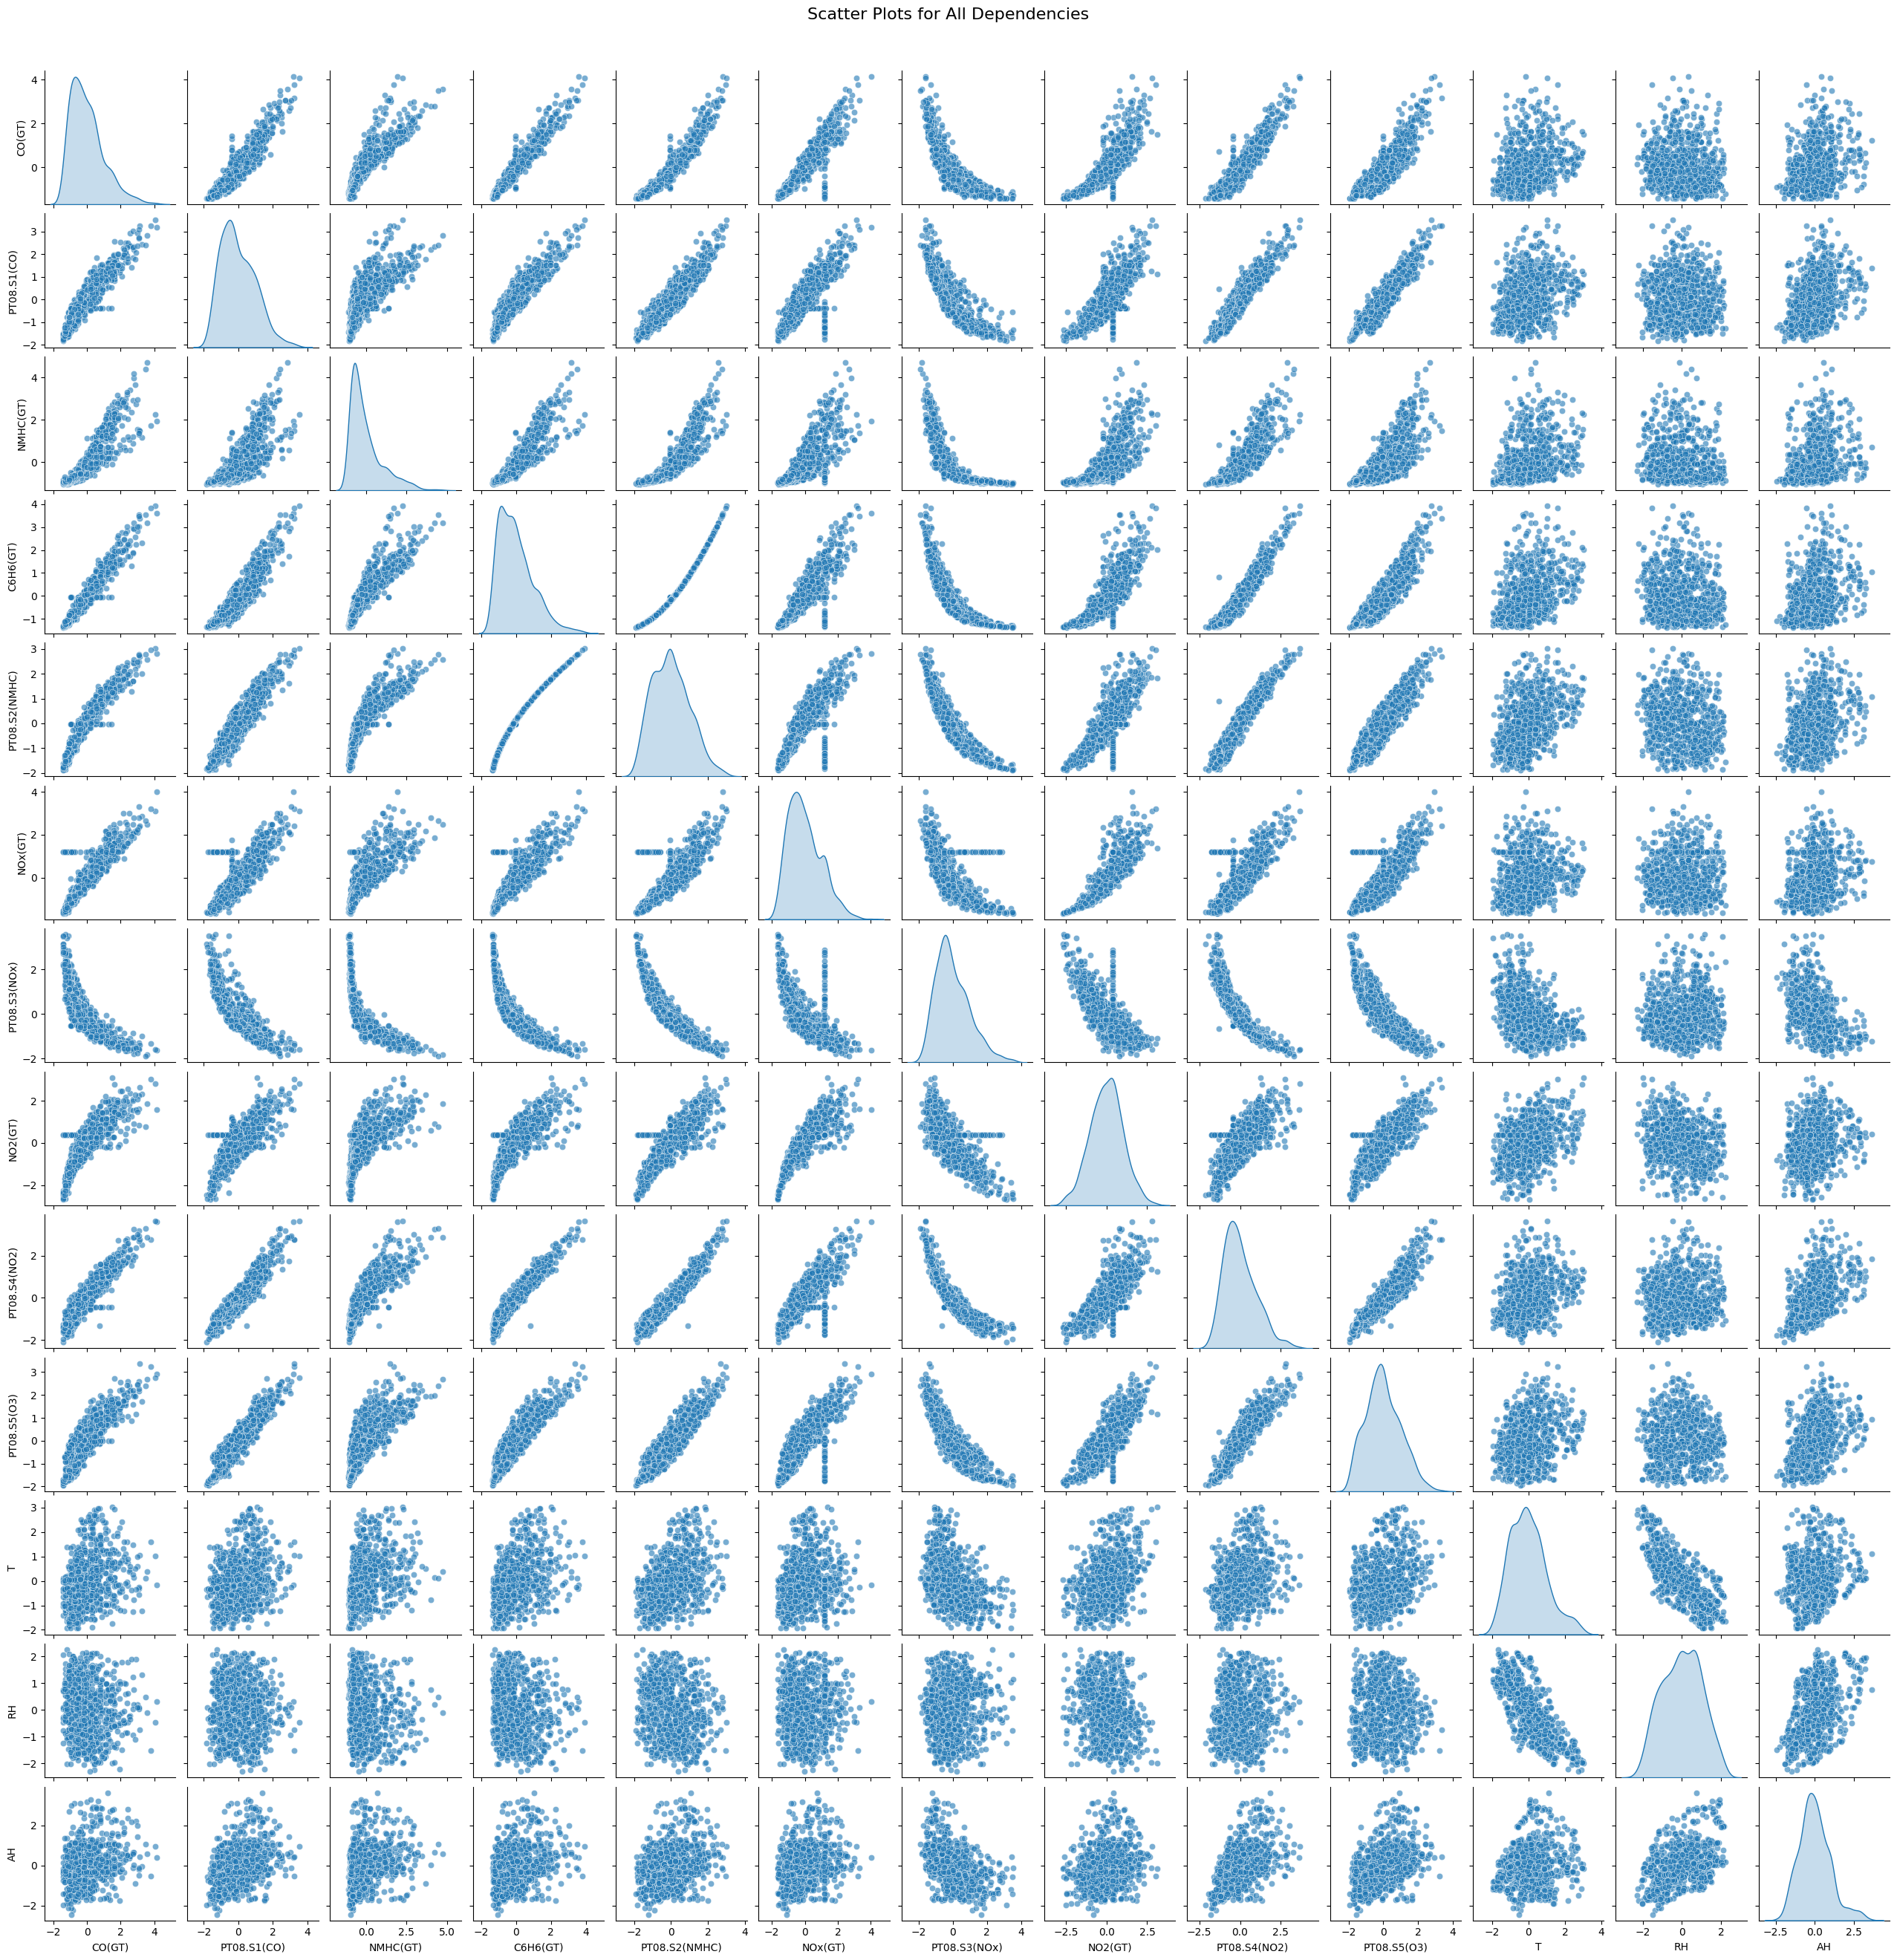

In [28]:
# Generate a pairplot for the dataset to show all dependencies
sns.pairplot(numeric_dataset, diag_kind="kde", plot_kws={'alpha': 0.6}, height=2)

# Display the plot
plt.suptitle("Scatter Plots for All Dependencies", y=1.02, fontsize=16)
plt.show()


In [29]:
# Check for non-finite values in the dataset
non_finite_counts = numeric_dataset[~np.isfinite(numeric_dataset)].count()

# Display columns with non-finite values and their counts
non_finite_counts


CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

## Q-Q Plot

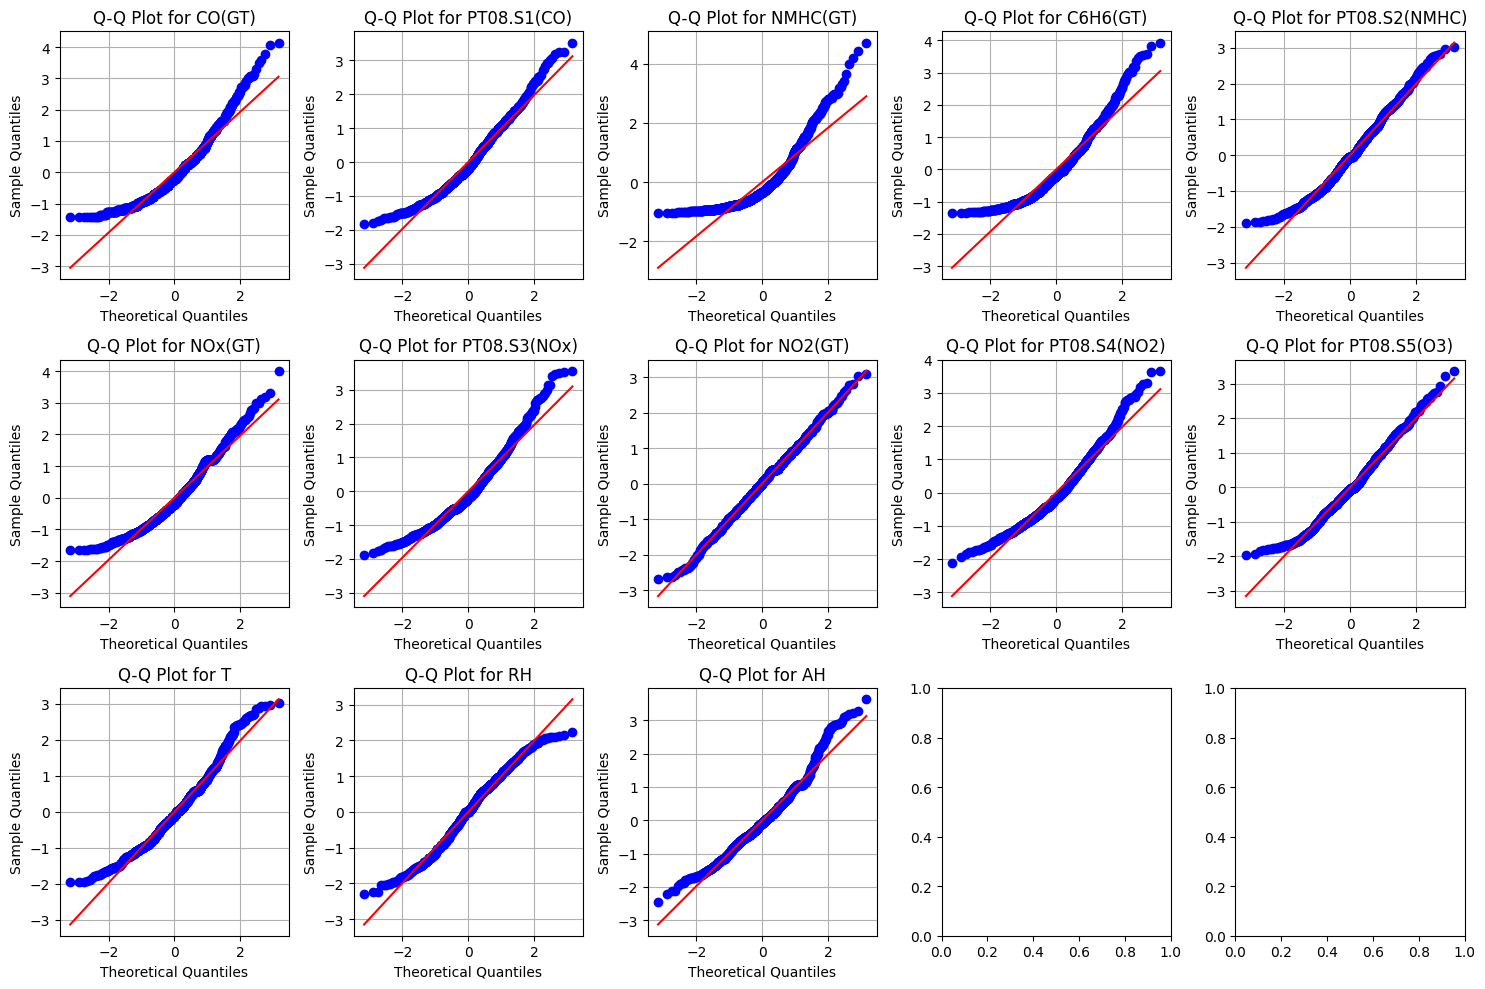

In [30]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Number of rows and columns for the subplot grid (adjust as needed)
n_rows = 3  # Number of rows
n_cols = 5  # Number of columns

# Create a single figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to easily index

# Loop through each numeric column and create a Q-Q plot
for i, column in enumerate(numeric_dataset.columns):
    ax = axes[i]  # Select the appropriate subplot
    stats.probplot(numeric_dataset[column], dist="norm", plot=ax)
    ax.set_title(f"Q-Q Plot for {column}", fontsize=12)
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Sample Quantiles")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## cdf

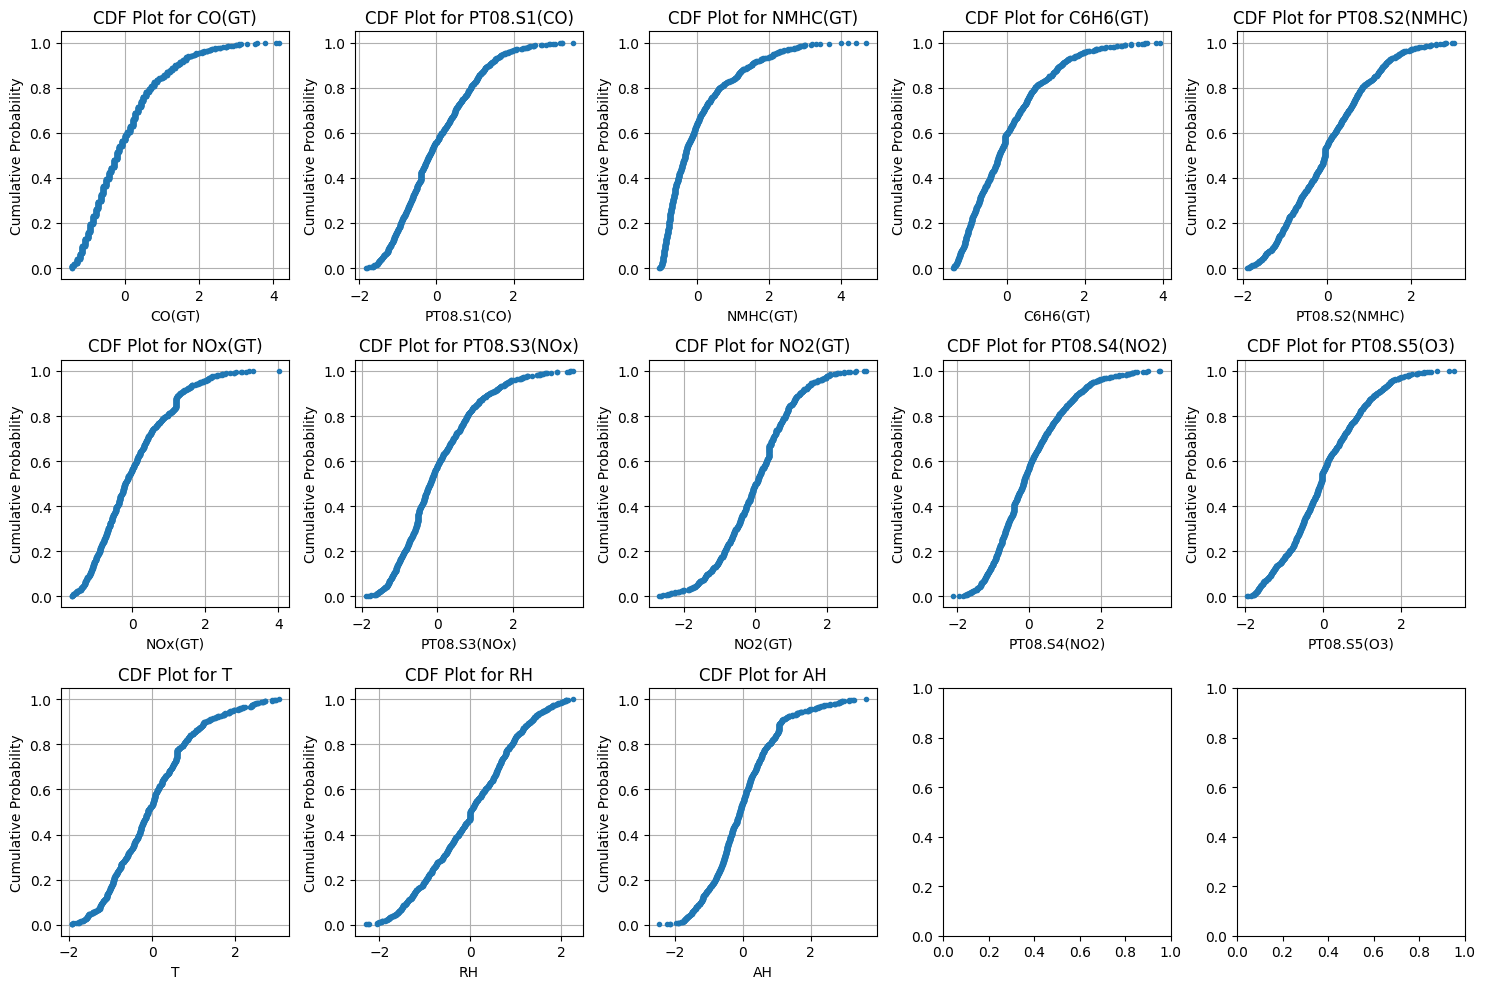

In [31]:
# Number of rows and columns for the subplot grid (adjust as needed)
n_rows = 3  # Number of rows
n_cols = 5  # Number of columns

# Create a single figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to easily index

# Loop through each numeric column and plot the CDF
for i, column in enumerate(numeric_dataset.columns):
    ax = axes[i]  # Select the appropriate subplot
    sorted_data = np.sort(numeric_dataset[column].dropna())
    cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    ax.plot(sorted_data, cumulative, marker='.', linestyle='none')
    ax.set_title(f"CDF Plot for {column}", fontsize=12)
    ax.set_xlabel(column)
    ax.set_ylabel("Cumulative Probability")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


##  Distribution Plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

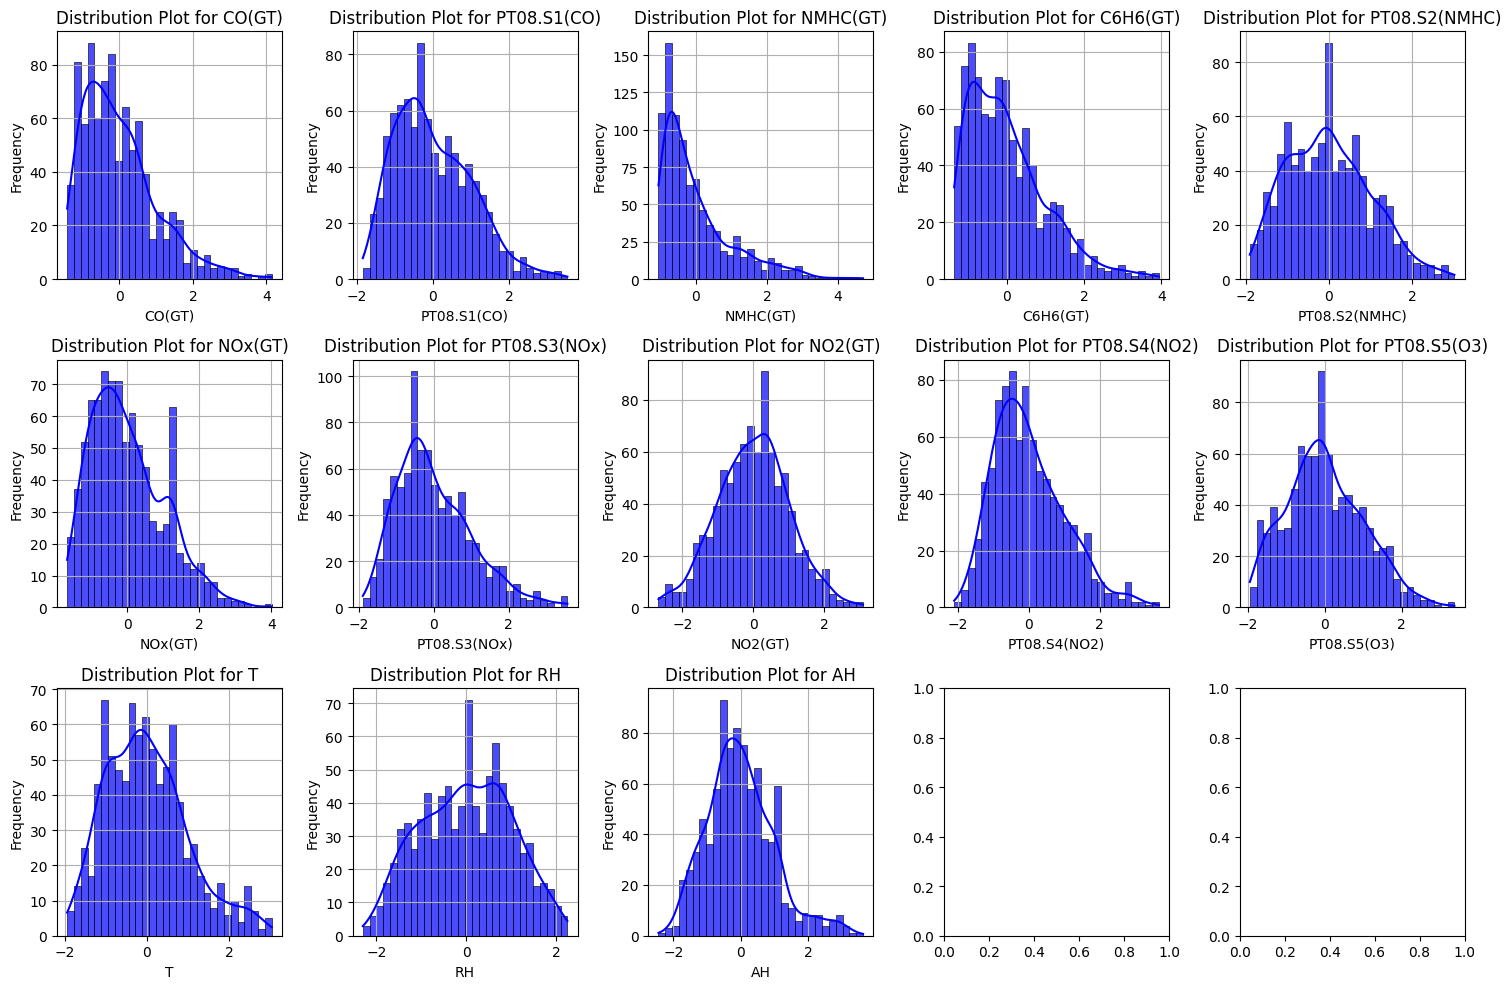

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of rows and columns for the subplot grid (adjust as needed)
n_rows = 3  # Number of rows
n_cols = 5  # Number of columns

# Create a single figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to easily index

# Loop through each numeric column and create a distribution plot
for i, column in enumerate(numeric_dataset.columns):
    ax = axes[i]  # Select the appropriate subplot
    sns.histplot(numeric_dataset[column], kde=True, bins=30, color='blue', alpha=0.7, ax=ax)
    ax.set_title(f"Distribution Plot for {column}", fontsize=12)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



## Box Plot

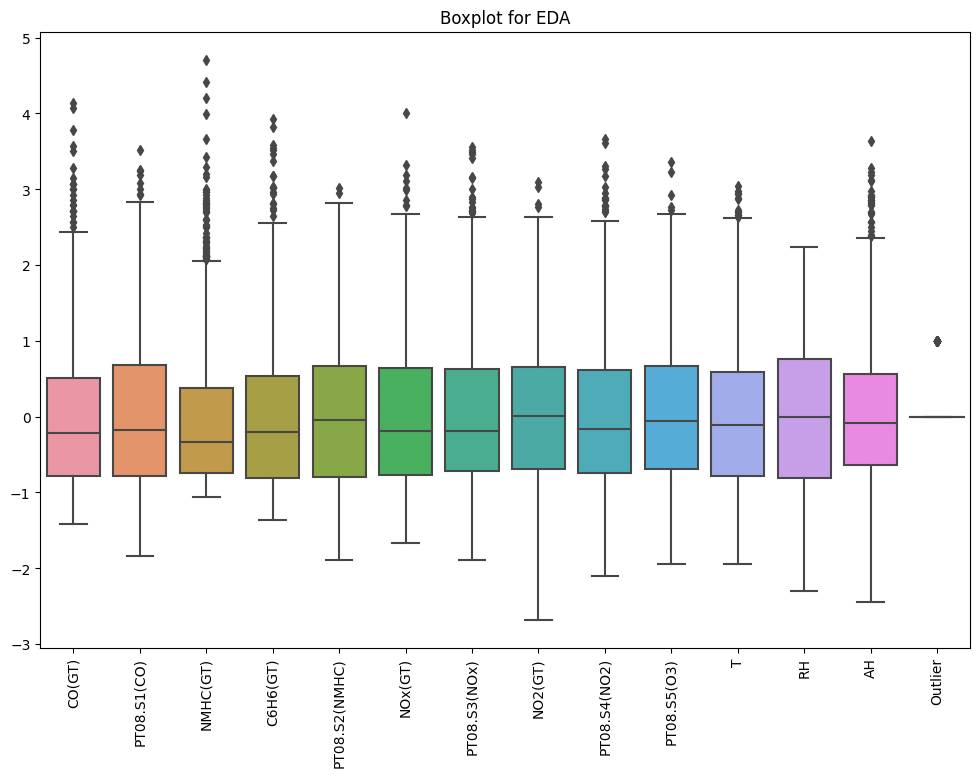

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['DateTime']))  # Dropping non-numeric column 'DateTime'

plt.title("Boxplot for EDA")
plt.xticks(rotation=90)  # Rotate column names for readability
plt.show()

## Describe Data

In [34]:
# Basic descriptive statistics
summary = data.describe()
print(summary)

             CO(GT)   PT08.S1(CO)      NMHC(GT)      C6H6(GT)  PT08.S2(NMHC)  \
count  8.900000e+02  8.900000e+02  8.900000e+02  8.900000e+02   8.900000e+02   
mean   4.790176e-17 -5.349030e-16  4.790176e-17  6.386901e-17  -1.756398e-16   
min   -1.422083e+00 -1.836331e+00 -1.057318e+00 -1.357489e+00  -1.896709e+00   
25%   -7.800534e-01 -7.767062e-01 -7.449662e-01 -8.075805e-01  -7.978077e-01   
50%   -2.093608e-01 -1.813181e-01 -3.398852e-01 -1.961915e-01  -4.832171e-02   
75%    5.040049e-01  6.867829e-01  3.775473e-01  5.415739e-01   6.699030e-01   
max    4.142170e+00  3.522163e+00  4.711425e+00  3.929830e+00   3.018240e+00   
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00   1.000562e+00   

            NOx(GT)  PT08.S3(NOx)       NO2(GT)  PT08.S4(NO2)   PT08.S5(O3)  \
count  8.900000e+02  8.900000e+02  8.900000e+02  8.900000e+02  8.900000e+02   
mean  -3.832141e-16 -2.235415e-16  3.911977e-16 -1.197544e-16  3.353123e-16   
min   -1.664217e+00 -1.896017e+00 -2.67586

## Analysis of Columns

In [35]:
# Loop through each numeric column
for column in data.select_dtypes(include=['number']).columns:
    # Mean of the column
    mean_value = data[column].mean()
    print(f"Mean of {column}: {mean_value}")

    # Median of the column
    median_value = data[column].median()
    print(f"Median of {column}: {median_value}")

    # Standard deviation of the column
    std_dev_value = data[column].std()
    print(f"Standard Deviation of {column}: {std_dev_value}")

    # Variance of the column
    variance_value = data[column].var()
    print(f"Variance of {column}: {variance_value}")

    # Min and Max values of the column
    min_value = data[column].min()
    max_value = data[column].max()
    print(f"Min of {column}: {min_value}, Max of {column}: {max_value}")
    print("-" * 40)  # Separator for clarity


Mean of CO(GT): 4.790175746697305e-17
Median of CO(GT): -0.20936081823554392
Standard Deviation of CO(GT): 1.0005622716215998
Variance of CO(GT): 1.0011248593925761
Min of CO(GT): -1.4220825563304063, Max of CO(GT): 4.142170124340137
----------------------------------------
Mean of PT08.S1(CO): -5.34902958381199e-16
Median of PT08.S1(CO): -0.18131806150744234
Standard Deviation of PT08.S1(CO): 1.0005622716215996
Variance of PT08.S1(CO): 1.001124859392576
Min of PT08.S1(CO): -1.8363306307453333, Max of PT08.S1(CO): 3.522162895315461
----------------------------------------
Mean of NMHC(GT): 4.790175746697305e-17
Median of NMHC(GT): -0.33988522595488774
Standard Deviation of NMHC(GT): 1.0005622716215996
Variance of NMHC(GT): 1.001124859392576
Min of NMHC(GT): -1.0573177312658375, Max of NMHC(GT): 4.711425270622207
----------------------------------------
Mean of C6H6(GT): 6.386900995596407e-17
Median of C6H6(GT): -0.1961915364825149
Standard Deviation of C6H6(GT): 1.0005622716215996
Vari

# Models
## Random Forest Regressor

In [36]:
data.to_csv("cleaneddata.csv")

In [37]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'DateTime', 'Outlier'],
      dtype='object')

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing
# Assuming 'CO(GT)' as the target variable (replace with your target column if different)
X = data.drop(columns=['CO(GT)', 'DateTime'])  # Drop non-predictive columns
y = data['CO(GT)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 0.0344
R-squared (R2): 0.9618


In [39]:
# Example input values (including Outlier)
new_example = {
    'PT08.S1(CO)': [50.0],
    'NMHC(GT)': [0.8],
    'C6H6(GT)': [0.2],
    'PT08.S2(NMHC)': [35.0],
    'NOx(GT)': [40.0],
    'PT08.S3(NOx)': [20.0],
    'NO2(GT)': [10.0],
    'PT08.S4(NO2)': [45.0],
    'PT08.S5(O3)': [22.0],
    'T': [22.5],
    'RH': [60],
    'AH': [10.0],
    'Outlier': [0]  # Assuming Outlier is not relevant, so setting it to 0
}

# Create DataFrame with the correct feature columns
new_example_df = pd.DataFrame(new_example)

# Predict using the trained model
prediction = rf_model.predict(new_example_df)
print(f"Predicted CO(GT): {prediction[0]:.4f}")


Predicted CO(GT): 2.6170


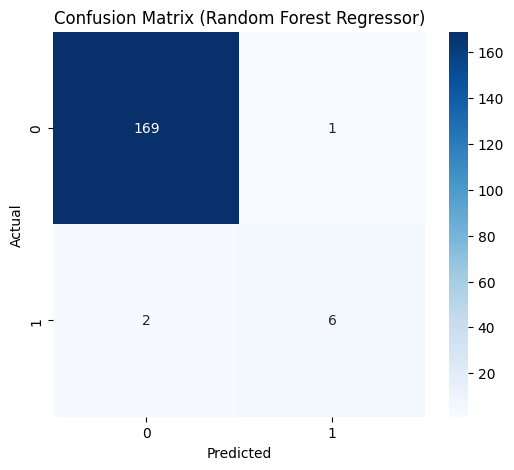

Accuracy: 0.9831
Precision: 0.8571
Recall: 0.7500
F1-score: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       170
           1       0.86      0.75      0.80         8

    accuracy                           0.98       178
   macro avg       0.92      0.87      0.90       178
weighted avg       0.98      0.98      0.98       178



In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.preprocessing import Binarizer

# Define a threshold for binary classification
threshold = 2.0  # Adjust threshold as needed
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred_rf > threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')  # Using 'Blues' color scheme
plt.title('Confusion Matrix (Random Forest Regressor)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))


In [41]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END ma

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9674106309309837)

## XGBoost

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Preprocessing
# Assuming 'CO(GT)' as the target variable (replace with your target column if different)
X = data.drop(columns=['CO(GT)', 'DateTime',])  # Drop non-predictive columns
y = data['CO(GT)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 0.0305
R-squared (R2): 0.9662


In [43]:
import pandas as pd

# Example input values
new_example = {
    'PT08.S1(CO)': [50.0],
    'NMHC(GT)': [0.8],
    'C6H6(GT)': [0.2],
    'PT08.S2(NMHC)': [35.0],
    'NOx(GT)': [40.0],
    'PT08.S3(NOx)': [20.0],
    'NO2(GT)': [10.0],
    'PT08.S4(NO2)': [45.0],
    'PT08.S5(O3)': [22.0],
    'T': [22.5],
    'RH': [60],
    'AH': [10.0],
    'Outlier': [0]  # Placeholder for Outlier
}

# Create DataFrame for the new example
new_example_df = pd.DataFrame(new_example)

# Predict using the trained XGBoost model
prediction = xgb_model.predict(new_example_df)
print(f"Predicted CO(GT): {prediction[0]:.4f}")


Predicted CO(GT): 1.3923


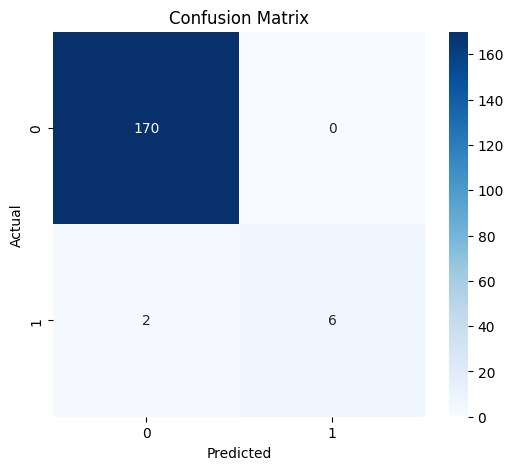

Accuracy: 0.9888
Precision: 1.0000
Recall: 0.7500
F1-score: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       170
           1       1.00      0.75      0.86         8

    accuracy                           0.99       178
   macro avg       0.99      0.88      0.93       178
weighted avg       0.99      0.99      0.99       178



In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Define a threshold for binary classification
threshold = 2.0  # Adjust threshold as needed
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred_xgb > threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))


## Support Vector Regressor(SVR)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(X_train, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 0.0265
R-squared (R2): 0.9706


In [46]:
import pandas as pd

# Example input values
new_example = {
    'PT08.S1(CO)': [50.0],
    'NMHC(GT)': [0.8],
    'C6H6(GT)': [0.2],
    'PT08.S2(NMHC)': [35.0],
    'NOx(GT)': [40.0],
    'PT08.S3(NOx)': [20.0],
    'NO2(GT)': [10.0],
    'PT08.S4(NO2)': [45.0],
    'PT08.S5(O3)': [22.0],
    'T': [22.5],
    'RH': [60],
    'AH': [10.0],
    'Outlier': [0]  # Placeholder for Outlier
}

# Create DataFrame for the new example
new_example_df = pd.DataFrame(new_example)

# Predict using the trained SVR model
prediction = svr_model.predict(new_example_df)
print(f"Predicted CO(GT): {prediction[0]:.4f}")

Predicted CO(GT): 0.6098


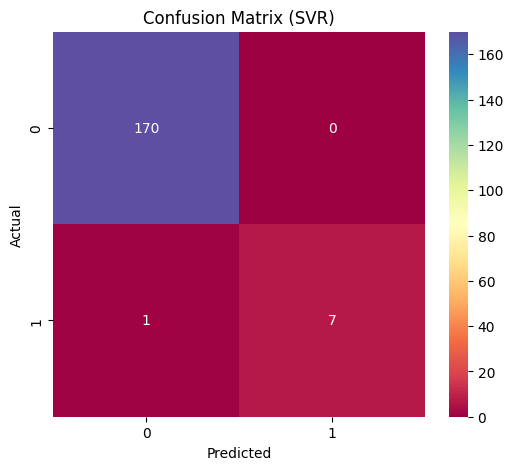

Accuracy: 0.9944
Precision: 1.0000
Recall: 0.8750
F1-score: 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       170
           1       1.00      0.88      0.93         8

    accuracy                           0.99       178
   macro avg       1.00      0.94      0.97       178
weighted avg       0.99      0.99      0.99       178



In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Define a threshold for binary classification
threshold = 2.0  # Adjust threshold as needed
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred_svr > threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Spectral', fmt='d')  # Using 'Oranges' color scheme
plt.title('Confusion Matrix (SVR)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))


## Neural Network(MLP)

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Multi-layer Perceptron (MLP) Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_mlp)
r2 = r2_score(y_test, y_pred_mlp)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 0.0196
R-squared (R2): 0.9782


In [49]:
import pandas as pd

# Example input values
new_example = {
    'PT08.S1(CO)': [50.0],
    'NMHC(GT)': [0.8],
    'C6H6(GT)': [0.2],
    'PT08.S2(NMHC)': [35.0],
    'NOx(GT)': [40.0],
    'PT08.S3(NOx)': [20.0],
    'NO2(GT)': [10.0],
    'PT08.S4(NO2)': [45.0],
    'PT08.S5(O3)': [22.0],
    'T': [22.5],
    'RH': [60],
    'AH': [10.0],
    'Outlier': [0]  # Placeholder for Outlier
}

# Create DataFrame for the new example
new_example_df = pd.DataFrame(new_example)

# Predict using the trained MLP model
prediction = mlp_model.predict(new_example_df)
print(f"Predicted CO(GT): {prediction[0]:.4f}")


Predicted CO(GT): 25.1851


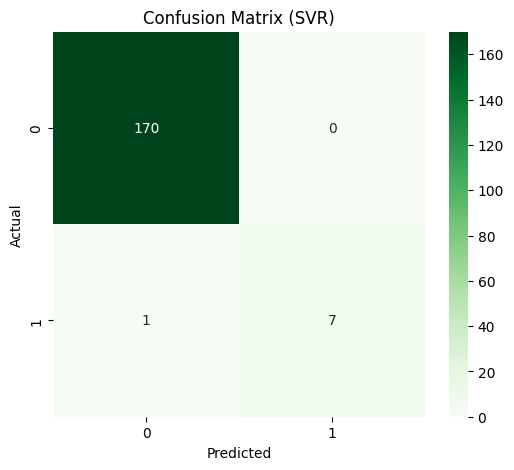

Accuracy: 0.9944
Precision: 1.0000
Recall: 0.8750
F1-score: 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       170
           1       1.00      0.88      0.93         8

    accuracy                           0.99       178
   macro avg       1.00      0.94      0.97       178
weighted avg       0.99      0.99      0.99       178



In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Define a threshold for binary classification
threshold = 2.0  # Adjust threshold as needed
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred_svr > threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='d')  # Using 'Greens' color scheme
plt.title('Confusion Matrix (SVR)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))


## Long Short-Term Memory Networks (LSTM)

In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preprocessing
target_column = 'CO(GT)' 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[[target_column]])

# Create sequences for LSTM
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Use the past 30 time steps to predict the next value
X, y = create_sequences(scaled_data, time_steps)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Rescale predictions and actual values back to original scale
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Evaluation
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0608 - val_loss: 0.0278
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0297 - val_loss: 0.0264
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0296 - val_loss: 0.0261
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0273 - val_loss: 0.0243
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0251 - val_loss: 0.0227
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0226 - val_loss: 0.0206
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0200 - val_loss: 0.0190
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0219 - val_loss: 0.0174
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0205 - val_loss: 0.0176
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0174 - val_loss: 0.0165
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0181 - val_loss: 0.0166
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - val_l

In [52]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred_svr: {len(y_pred_svr)}")


Length of y_test: 172
Length of y_pred_svr: 178


In [53]:
y_pred_svr = y_pred_svr[:len(y_test)]

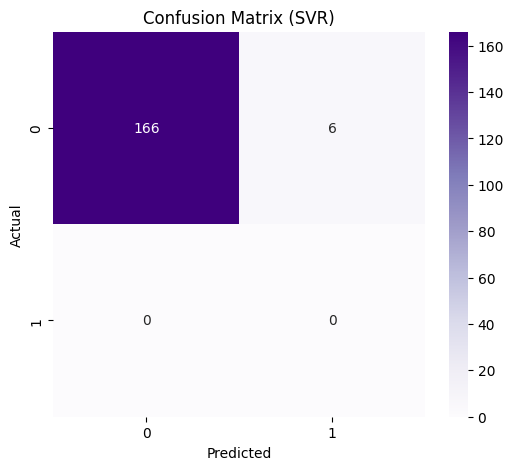

Accuracy: 0.9651
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       172
           1       0.00      0.00      0.00         0

    accuracy                           0.97       172
   macro avg       0.50      0.48      0.49       172
weighted avg       1.00      0.97      0.98       172



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Reca

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Define a threshold for binary classification
threshold = 2.0  # Adjust threshold as needed
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred_svr > threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='d')  # Using 'Purples' color scheme
plt.title('Confusion Matrix (SVR)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))


In [55]:
import numpy as np

# Example of the last 30 values (scaled) from the target column (CO(GT))
last_30_values = np.array([0.5, 0.45, 0.47, 0.46, 0.43, 0.49, 0.51, 0.53, 0.52, 0.50,
                           0.48, 0.47, 0.45, 0.46, 0.48, 0.50, 0.52, 0.51, 0.53, 0.54,
                           0.55, 0.56, 0.58, 0.57, 0.56, 0.55, 0.54, 0.52, 0.51, 0.50])

# Reshape it to be a 3D array as expected by the LSTM model (samples, time steps, features)
last_30_values_reshaped = last_30_values.reshape(1, 30, 1)

# Predict using the trained LSTM model
predicted_value = model.predict(last_30_values_reshaped)

# Rescale the prediction back to the original scale
predicted_value_rescaled = scaler.inverse_transform(predicted_value)

print(f"Predicted CO(GT) for the next time step: {predicted_value_rescaled[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted CO(GT) for the next time step: 0.9743


# Ensemble Models
## Combine predictions

In [56]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Align dimensions
min_length = min(len(y_pred_rf), len(y_pred_xgb), len(y_pred_svr), len(y_pred_mlp), len(y_pred_rescaled))
y_pred_rf = y_pred_rf[:min_length]
y_pred_xgb = y_pred_xgb[:min_length]
y_pred_svr = y_pred_svr[:min_length]
y_pred_mlp = y_pred_mlp[:min_length]
y_pred_rescaled = y_pred_rescaled[:min_length]

# Combine predictions
predictions = np.column_stack([
    y_pred_rf,
    y_pred_xgb,
    y_pred_svr,
    y_pred_mlp,
    y_pred_rescaled.ravel()
])

# Meta-model (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(predictions, y_test_rescaled.ravel())
final_predictions = meta_model.predict(predictions)

# Evaluate ensemble
mse = mean_squared_error(y_test_rescaled, final_predictions)
r2 = r2_score(y_test_rescaled, final_predictions)

print(f"Ensemble Mean Squared Error (MSE): {mse:.4f}")
print(f"Ensemble R-squared (R2): {r2:.4f}")


Ensemble Mean Squared Error (MSE): 0.3598
Ensemble R-squared (R2): 0.6530


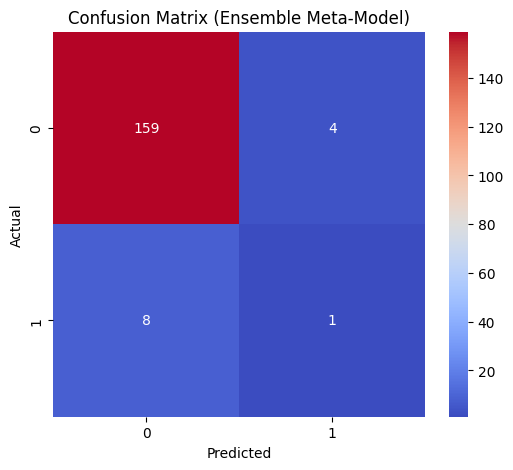

Accuracy: 0.9302
Precision: 0.2000
Recall: 0.1111
F1-score: 0.1429

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       163
           1       0.20      0.11      0.14         9

    accuracy                           0.93       172
   macro avg       0.58      0.54      0.55       172
weighted avg       0.91      0.93      0.92       172



In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Define a threshold for binary classification
threshold = 2.0  # Adjust threshold as needed
y_test_class = (y_test_rescaled > threshold).astype(int)
final_predictions_class = (final_predictions > threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, final_predictions_class)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')  # Using 'coolwarm' color palette
plt.title('Confusion Matrix (Ensemble Meta-Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification metrics
accuracy = accuracy_score(y_test_class, final_predictions_class)
precision = precision_score(y_test_class, final_predictions_class)
recall = recall_score(y_test_class, final_predictions_class)
f1 = f1_score(y_test_class, final_predictions_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_class, final_predictions_class))


# Prediction
## Meta-Model Prediction Input

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preprocessing
target_column = 'CO(GT)' 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[[target_column]])

# Create sequences for LSTM
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Use the past 30 time steps to predict the next value
X, y = create_sequences(scaled_data, time_steps)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Rescale predictions and actual values back to original scale
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Post-processing: Ensure all predictions are positive
y_pred_rescaled = np.maximum(y_pred_rescaled, 0)  # ReLU activation

# Evaluation
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Display the first prediction
print(f"LSTM Predicted CO(GT): {y_pred_rescaled[0][0]:.4f}")


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0657 - val_loss: 0.0285
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0263 - val_loss: 0.0271
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0281 - val_loss: 0.0263
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0248 - val_loss: 0.0244
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0231 - val_loss: 0.0230
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0213 - val_loss: 0.0214
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0216 - val_loss: 0.0193
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0189 - val_loss: 0.0184
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0181 - val_loss: 0.0163
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0172 - val_loss: 0.0152
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0140 - val_loss: 0.0140
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0165 - val_l